# Visual-Optics

# Axes

- 안구는 보통 비대칭성을 가진 비대칭계
- 따라서, Fixation point와 fovea의 축이 대칭적이지 않음

<br>

### Optical Axis
- 안구의 중심축에 가장 근사한 선

<br>

### Line of Sight
- Pupil 중심을 통과하여 Fixation Point(Target)와 Fovea를 잇는 선
- 실제로 시선이 되는 축을 정의 (우리가 예측하고자 하는 Gaze Vector에 해당)

<br>

### Visual Axis
- (N)Nodal Point (절점:광학)를 통과하여 (T)Fixation Point(Target)와 Fovea를 잇는 선
- TN, N'T' N과 N' 모두 상측절점(후방절점)인데 차이는 무엇인지? 물측절점(전방절점)은 아닌 듯
- 동공의 깊이 크기와 독립적이기도 해서 reference 시축으로 사용하기도 함
- 일반적으로 Line of Sight와 큰 차이가 나지 않는다고 함

<br>

### Pupillary Axis
- (E)동공 입구 중심에서 (Cc)각막 곡률 중심으로 통과하는 선
- Eccentric Fixation을 예측할 때 사용하는 축
- (P)동공이 각막에 대해 중심에 위치하지는 않아서 Optical Axis와 차이 있음 (중심이면 Optical 축과 동일)
- 각막 곡률 중심이 왜 저 위치인지 잘 모르겠음

<br>

### Fixation Axis
- (T)Fixation Point와 (C)안구 회전축 중심점을 연결한 선
- 안구 운동을 측정할 때 참고되는 축

In [1]:
# # kappa angle 
# k1 = degree_to_rad(1)
# k2 = degree_to_rad(2)
# k3 = degree_to_rad(3)
# k4 = degree_to_rad(4)
# k5 = degree_to_rad(5)

# k = 30
# print("{}cm에서 1도 오차: {}".format(k, np.tan(k1) * k))
# print("{}cm에서 2도 오차: {}".format(k, np.tan(k2) * k))
# print("{}cm에서 3도 오차: {}".format(k, np.tan(k3) * k))
# print("{}cm에서 4도 오차: {}".format(k, np.tan(k4) * k))
# print("{}cm에서 5도 오차: {}".format(k, np.tan(k5) * k))
# k = 40
# print("{}cm에서 1도 오차: {}".format(k, np.tan(k1) * k))
# print("{}cm에서 2도 오차: {}".format(k, np.tan(k2) * k))
# print("{}cm에서 3도 오차: {}".format(k, np.tan(k3) * k))
# print("{}cm에서 4도 오차: {}".format(k, np.tan(k4) * k))
# print("{}cm에서 5도 오차: {}".format(k, np.tan(k5) * k))

![카파각 분포](./imgs/kappa-statstics.png)


# Angle

<br>

#### Angle Alpha 
- Optical axis와 Visual axis 각차
- 측정법 : Fixation target을 응시했을 때의 차이로 계산 
- 엄밀하게는 line of sight의 각차이지만 현실에서는 동일하게 두면 됨
- Optical Axis 측정 : 빔을 통해 반사되는 4 주요 반사점을 활용 (푸르킨예 상 Purkinje images)
- 근시안에서 이 수치는 줄어듬 (기하학적으로)
- 평균 수치 
    - horizontal : 비측 방향을 양의 방향으로 5 정도 (+4.8 +- 5.1)
    - vertical : +1.5 +- 3.4

<br>

![Purkinje images](./imgs/purkinje-images.png)
![alpha 분포도](./imgs/alpha-statstics.png)


![안구 모델](./imgs/detail-model.png)

# 필요한 parameter

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [3]:
sys.path.append("../../../")

%run ../../../ac/math/3ds.py
%run ../../../ac/math/angles.py

# 관계

#### PC 거리 (동공 입사 중점, 안구 회전축 중점) 
#### vec(o) 안축 (optical axis vector)
#### vec(s) 시축 (line of sight)
#### head pose

#### vec(o) + vec(k) = vec(s)
#### vec(k) = vec(s) - vec(o)
#### vec(k)는 눈을 기준으로 한 3차원 회전에 적용받아 vec(k')으로 계산

- 고개 회전이 있어야 정확한 캘리브레이션 가능 (카파각이 2차원에 걸친경우)


In [4]:
vec_origin = np.array([0, -100, 30])
vec_o = np.array([0, 50, 30])
vec_s = np.array([20, 50, 30])
vec_k = vec_s - vec_o

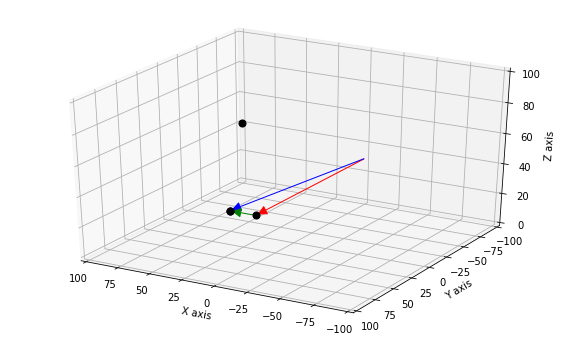

In [24]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

draw_vector(ax, vec_origin, vec_o, line_color="R", proj=False)
draw_vector(ax, vec_origin, vec_s, line_color="B", proj=False)
draw_vector(ax, vec_o, vec_s, line_color="G", proj=False)

cam = np.array([[0,  0,  0,   100],
                [0,  0,  0,  -100],
                [0,  0,  0,   40],
                [0,  0,  0,     1]
               ])
draw_point_with_axis(ax, cam)

scale = 100
ax.set_xlim([scale,-scale]), ax.set_ylim([scale,-scale]), ax.set_zlim([0,scale])
ax.set_xlabel('X axis'), ax.set_ylabel('Y axis'), ax.set_zlabel('Z axis')
plt.show()

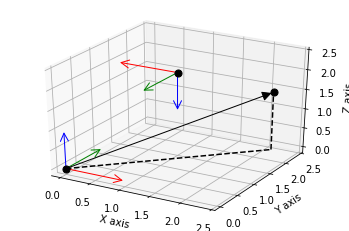

In [6]:
P_atA = np.array([2.2,2.2,1.5])
BORG = np.array([[-1, 0, 0, 1],
                [0, -1, 0, 1.5],
                [0, 0, -1, 2],
                [0, 0, 0, 1]])

AORG = np.array([0,0,0])
hat_X_atA = np.array([1,0,0])
hat_Y_atA = np.array([0,1,0])
hat_Z_atA = np.array([0,0,1])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

draw_point_with_axis(ax, AORG, hat_X_atA, hat_Y_atA, hat_Z_atA, pointEnable=False)
draw_vector(ax, AORG, P_atA, arrowstyle='-|>')
draw_point_with_axis(ax, BORG)

ax.set_xlim([-0.1,2.5]), ax.set_ylim([-0.1,2.5]), ax.set_zlim([-0.1,2.5])
ax.set_xlabel('X axis'), ax.set_ylabel('Y axis'), ax.set_zlabel('Z axis')
plt.show()